### Multiple-NNP method

In [1]:
# tools for NNP development
import pynnp as pn

import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
mpl.style.use('bmh')

In [2]:
# number of configurations
nconf = 500


# number of NNPs
npot = 3

In [3]:
# rm -f nnp.data && lmp_serial < md.nnp.rerun.in 
# python ../../../lammps_to_runner.py nnp.data input.data

### NNPs

In [4]:
pot0 = pn.RunnerAdaptor().read_runner("../input.data")
pot0.select(range(nconf))
print ("range of energy: ", pot0.range_of_energy*pn.HARTREE_TO_MEV)
print ("range of force : ", pot0.range_of_force*pn.HARTREE_TO_EV)

range of energy:  36.34131944122949
range of force :  8.359391195790497


In [5]:
# dis = pot0.calculate_min_distances()
# plt.plot(dis*pn.BOHR_TO_ANGSTROM)

In [6]:
pot = []
for i in range(npot):
    pot.append( pn.RunnerAdaptor().read_runner("%s/input.data"%(i+1)))
    pot[-1].select(range(nconf))

### Energy

RMSE (pot0): 0.9172550598017685
RMSE (pot1): 1.0655443600951982
RMSE (pot2): 1.4741475711453917


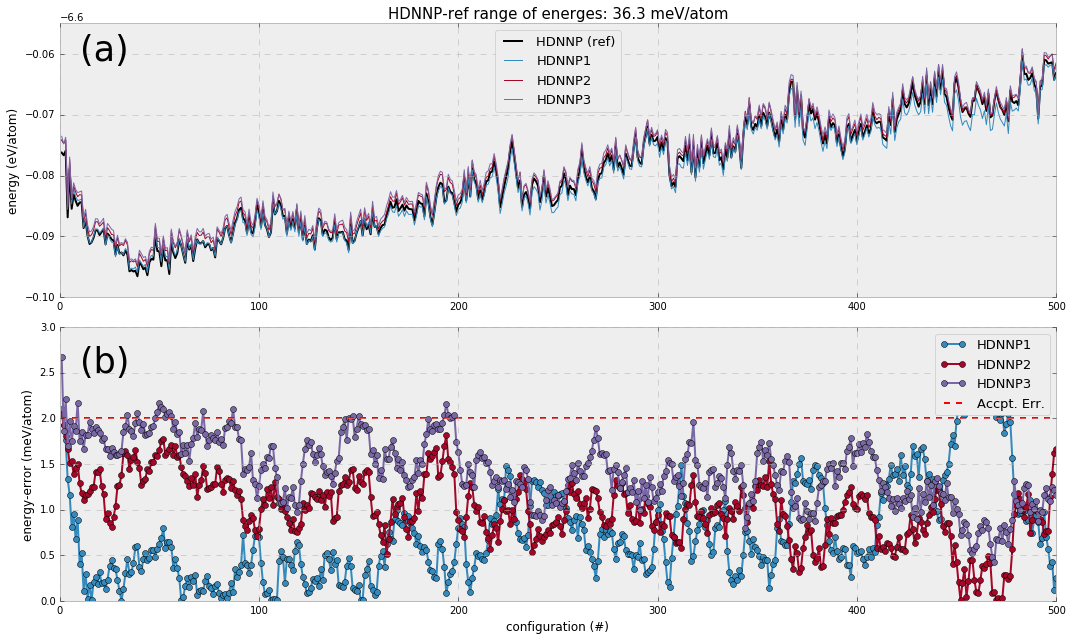

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(15,9))

# --------------------------------------------------

# reference NNP
conf = range(1, pot0.number_of_samples+1, 1)
energy0 = pot0.energies*pn.HARTREE_TO_EV

ax[0].plot(conf, energy0, '-k', label='HDNNP (ref)')    
ax[0].set_title("HDNNP-ref range of energes: %3.1f meV/atom" % (pot0.range_of_energy*pn.HARTREE_TO_MEV), fontsize=15)
   
# --------------------------------------------------
       
# other NNPs
for n in range(npot):

    # energy
    energy = pot[n].energies*pn.HARTREE_TO_EV
    ax[0].plot(conf, energy, '-', label="HDNNP%s"%(n+1), lw=1)
    
    # energy-error
    error = pot[n].calculate_energy_errors(pot0)*pn.HARTREE_TO_MEV
    ax[1].plot(conf, error, '-o', label="HDNNP%s"%(n+1))
    print(f"RMSE (pot{n}): {sqrt(np.mean(error**2))}")

ax[1].axhline(2, color='r', linestyle='--', label='Accpt. Err.')   
ax[1].legend(fontsize=13, loc='upper center')
ax[1].text(10, 2.5, "(b)", fontsize=35)
# --------------------------------------------------
    
ax[0].legend(fontsize=13, loc='upper center')
ax[0].text(10, -6.661, "(a)", fontsize=35)
ax[0].set_ylabel("energy (eV/atom)", fontsize=12)
# ax[0].grid()    
# ax[0].set_xlim([0, nconf])

plt.xlabel("configuration (#)", fontsize=12)
plt.legend(fontsize=13)
plt.xlabel("configuration (#)", fontsize=12)
plt.ylabel("energy-error (meV/atom)", fontsize=12)
# plt.grid()
plt.tight_layout()
# ax[0].xaxis.set_major_locator(MultipleLocator(10))
plt.savefig("energy-error.eps")

### Force

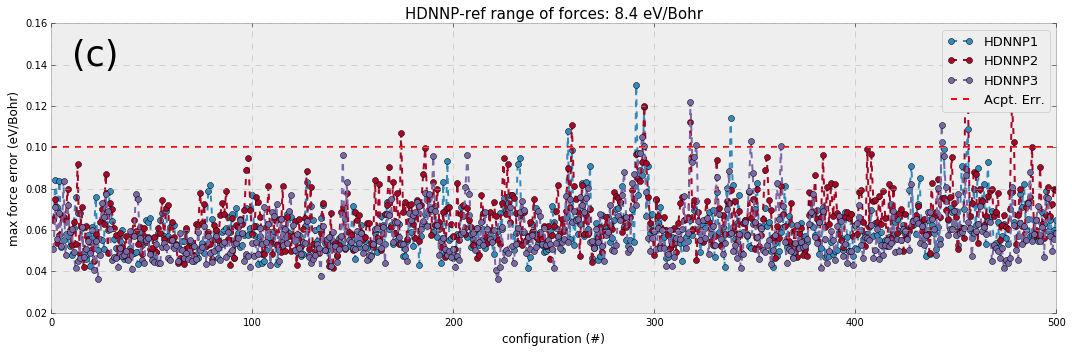

In [15]:
fig, ax = plt.subplots(figsize=(15,5))

# --------------------------------------------------

# reference NNP
conf = range(1, pot0.number_of_samples+1, 1) 
plt.title("HDNNP-ref range of forces: %3.1f eV/Bohr" % (pot0.range_of_force*pn.HARTREE_TO_EV), fontsize=15)

# --------------------------------------------------
       
# other NNPs
for n in range(npot):
    # force error
    error = pot[n].calculate_force_errors(pot0, method="max")*pn.HARTREE_TO_EV
    plt.plot(conf, error, '--o', label="HDNNP%s"%(n+1)) # /np.mean(force)
    
# --------------------------------------------------
    
plt.text(10, 0.14, "(c)", fontsize=35)
plt.axhline(0.1, color='r', linestyle='--', label='Acpt. Err.')
plt.legend(fontsize=13)
plt.xlabel("configuration (#)", fontsize=12)
plt.ylabel("max force error (eV/Bohr)", fontsize=12)
# plt.grid()
plt.tight_layout()
# ax.xaxis.set_major_locator(MultipleLocator(5))
plt.savefig("force-error.eps")

### Select problematic samples (configurations)

In [9]:
sel_filename = "input.data.sel3"
print (sel_filename)
pn.RunnerAdaptor().read_runner("../input.data").select(range(0, 500, 10)).write_runner(sel_filename)

input.data.sel3


100
(32400, 3)


0.30118297559999996

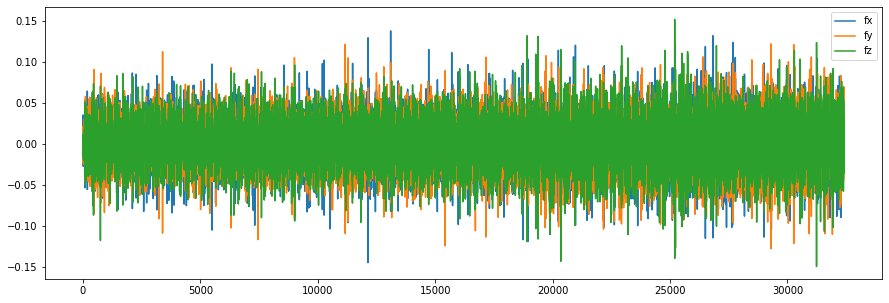

In [136]:
# range of forces of selected structures
# -----------------------------------------------
ra = pn.RunnerAdaptor().read_runner(sel_filename)
print (ra.number_of_samples)

fig, ax = plt.subplots(figsize=(15,5))
f = ra.get_forces()
plt.plot(f)
plt.legend(['fx', 'fy', 'fz'])
print (f.shape)
ra.range_of_force

In [461]:
# based on error threshold
# sel = []
# for n in range(npot):
#     index = pot0.find(pot[n], force_error_threshold=0.1*pn.EV_TO_HARTREE)
#     print ("pot(%d) :"%(n+1), len(index))
#     sel = sel + index

# sel = list(set(sel))
# print ("number of selected samples", len(sel))
# print (sel)

In [462]:
# pn.RunnerAdaptor().read_runner("../input.data").select(sel).write_runner("input.data.sel.w33")

### Reduced number of samples

In [463]:
# pn.RunnerAdaptor().read_runner("input.data").select(range(1000,1420)).sample(400).write_runner("input.data.400ANL")

In [464]:
# data = pn.RunnerAdaptor().read_runner("../input.data")

In [465]:
# data.range_of_energy*pn.HARTREE_TO_MEV

In [466]:
# data.range_of_force*pn.HARTREE_TO_EV

### Conversion: input.data ---> input.xyz

In [155]:
ra = pn.RunnerAdaptor().read_runner("input.data")#.select(range(0, 2700))
print (ra.number_of_samples)

uc = pn.UnitConversion(length_conversion=0.529177)
ra.write_xyz("input.xyz", uc=uc)

200


### Analyze range of energy and force

2.824025296207555

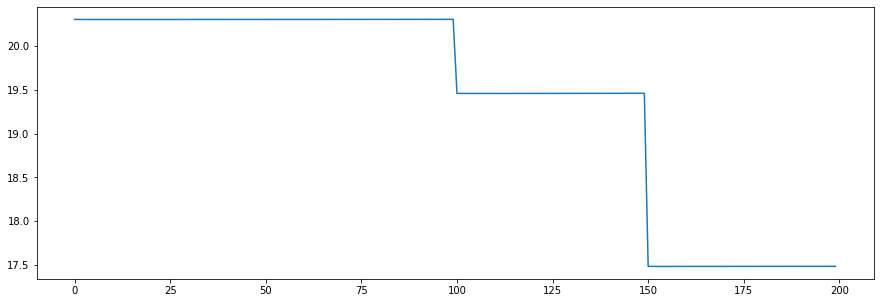

In [156]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(ra.get_energies())
ra.range_of_energy

In [157]:
# ra.delete([2887,2889, 2848, 2899]+[_ for _ in range(1763,1770)]+[_ for _ in range(2874,2878)])
# ra.write_runner("input.data.clean")
# ra.number_of_samples

(78300, 3)


0.2999348732

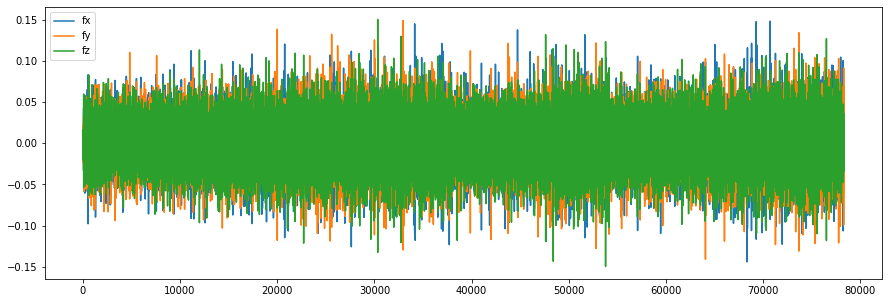

In [182]:
fig, ax = plt.subplots(figsize=(15,5))
f = ra.get_forces()
plt.plot(f)
plt.legend(['fx', 'fy', 'fz'])
print (f.shape)
ra.range_of_force

In [20]:
# ra.write_runner("input.data.sel.old3")

In [21]:
# Ha --> eV
# uc = pn.UnitConversion(energy_conversion=27.2114)
# ra = pn.RunnerAdaptor().read_runner("input.data")
# print (ra.number_of_samples)
# ra.write_runner("input.data.eV", uc=uc)

### Remove atomic energy

In [2]:
ra = pn.RunnerAdaptor().read_runner("input.data") #.select(range(2116, 2500))
print (ra.number_of_samples)

atomic_energy = {'H': 0.45890771, 'O': 74.94518524, 'B': 0.0, 'N': 0.0}
ra.remove_atomic_energy(atomic_energy)

ra.write_runner("input.data.rmeng")

53


In [4]:
# ra = pn.RuNNerAdaptorForLAMMPS().read_lammps("../nnp.data")
# ra.dataset.samples[0].sum_atomic_energy()

### RuNNer to LAMMPS

In [2]:
dft =  pn.RuNNerAdaptorForLAMMPS().read_runner("input.data.dft")

In [3]:
# convert compatible units for RuNNer package
uc = pn.UnitConversion(energy_conversion=pn.EV_TO_HARTREE, length_conversion=pn.BOHR_TO_ANGSTROM)
dft.write_lammps("nnp.data.dft", {'H': '1', 'B': '2', 'N': '3', 'O': '4'}, uc)

## DFT vs NNP

In [17]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
mpl.style.use('bmh')

In [18]:
dft = pn.RunnerAdaptor().read_runner("input.data.dft") #.select(range(500))
nnp =  pn.RunnerAdaptor().read_runner("dft/input.data") #.select(range(500))

### Energy

500 36.01639003563165
500 36.33663194966708
[-6.67523646 -6.67567299 -6.67493142 -6.68587264 -6.67792351]


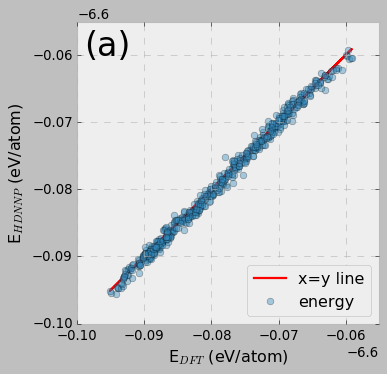

In [19]:
fig, ax = plt.subplots(figsize=(5,5))

dft_eng = dft.get_energies()*pn.HARTREE_TO_EV
print(dft.number_of_samples, dft.range_of_energy*pn.HARTREE_TO_MEV)

nnp_eng = nnp.get_energies()*pn.HARTREE_TO_EV+0.001
print(nnp.number_of_samples, nnp.range_of_energy*pn.HARTREE_TO_MEV)

plt.plot(dft_eng, dft_eng, '-r', label='x=y line')
plt.plot(dft_eng, nnp_eng , 'o', alpha=0.4, label='energy')

plt.text(-6.699, -6.66, "(a)", fontsize=30)
plt.xlabel("E$_{DFT}$ (eV/atom)")
plt.ylabel("E$_{HDNNP}$ (eV/atom)")
ax.set_aspect('equal', 'box')
plt.legend(loc='lower right', numpoints=1)
plt.tight_layout()
plt.savefig("energy-dft.png")
print(nnp_eng[:5])

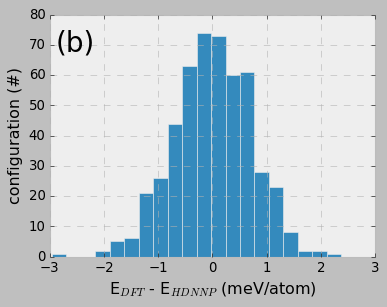

In [20]:
fig, ax = plt.subplots(figsize=(5,4))

error = (dft_eng - nnp_eng)*1e3
error -= np.mean(error)

plt.hist(error, bins=20);
plt.ylabel("configuration (#)")
plt.xlabel("E$_{DFT}$ - E$_{HDNNP}$ (meV/atom)")
plt.text(-2.9, 68, "(b)", fontsize=25)
plt.tight_layout()
plt.savefig("energy-error-dft.eps")

### Force

500 8.378599801453772
500 8.35969282853829


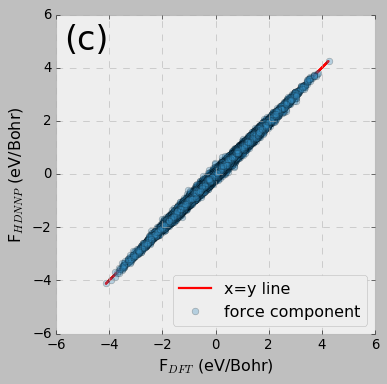

In [21]:
fig, ax = plt.subplots(figsize=(5,5))

dft_frc = dft.get_forces().reshape(-1)*pn.HARTREE_TO_EV; 
print(dft.number_of_samples, dft.range_of_force*pn.HARTREE_TO_EV)

nnp_frc = nnp.get_forces().reshape(-1)*pn.HARTREE_TO_EV
print(nnp.number_of_samples, nnp.range_of_force*pn.HARTREE_TO_EV)

plt.plot(dft_frc, dft_frc, '-r', label='x=y line')
plt.plot(dft_frc, nnp_frc , 'o', alpha=0.3, label='force component')

plt.xlabel("F$_{DFT}$ (eV/Bohr)")
plt.ylabel("F$_{HDNNP}$ (eV/Bohr)")
ax.set_aspect('equal', 'box')
plt.legend(loc='lower right', numpoints=1)
plt.text(-5.7, 4.7, "(c)", fontsize=30)
plt.tight_layout()
plt.savefig("force-dft.png")

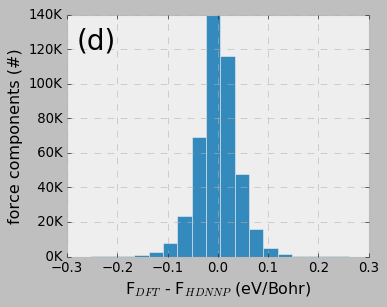

In [22]:
fig, ax = plt.subplots(figsize=(5,4))

error = (dft_frc - nnp_frc)
# error -= np.mean(error)

plt.hist(error, bins=30);
y_vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}K'.format(x * 0.001) for x in y_vals])

plt.text(-0.28, 12e4, "(d)", fontsize=25)
plt.ylabel("force components (#)")
plt.xlabel("F$_{DFT}$ - F$_{HDNNP}$ (eV/Bohr)")
plt.xlim([-0.3, 0.3])

plt.tight_layout()
plt.savefig("force-error-dft.eps")